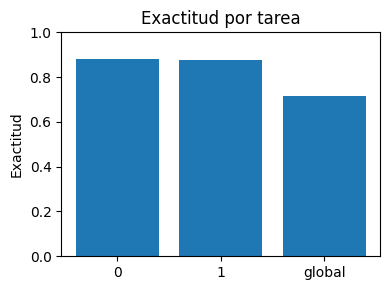

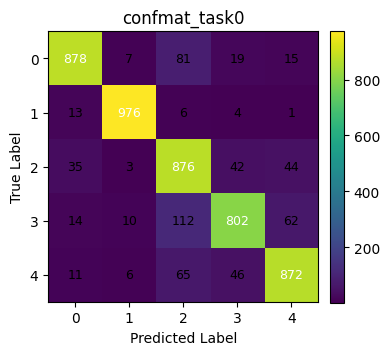

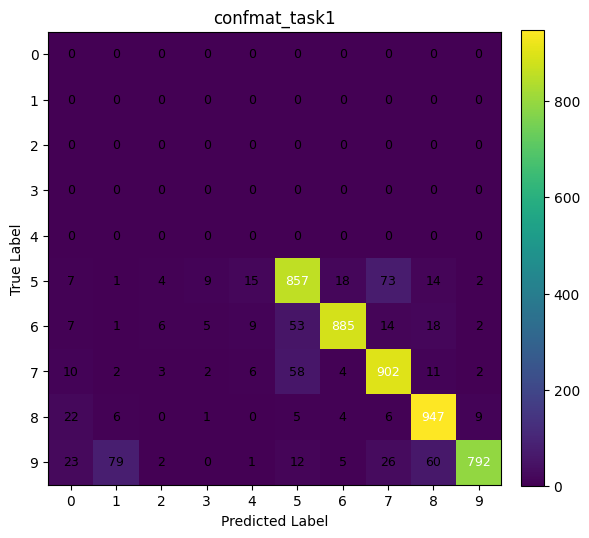

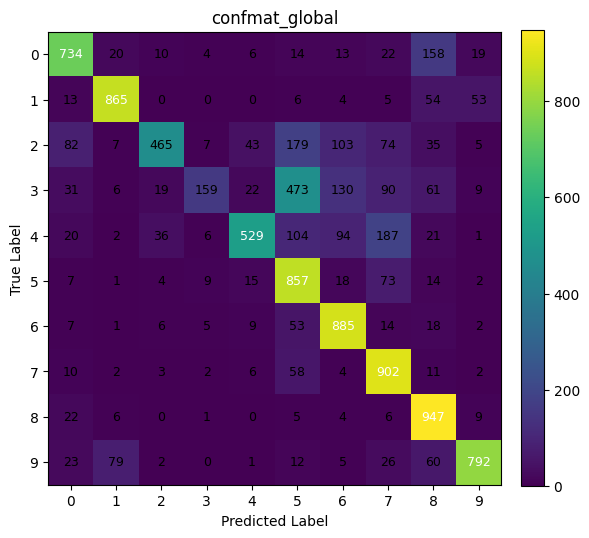

In [1]:
#!/usr/bin/env python3
# visualize_metrics.py  –  exactitudes + confusiones con tamaño adaptativo
import json
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pathlib import Path

# ─────────────────────────────── 1. Exactitud por tarea ───────────────────────────────
metrics = json.loads(Path("metrics.json").read_text())
tasks      = [str(m["task"]) for m in metrics]
accuracies = [m["accuracy"]  for m in metrics]

plt.figure(figsize=(4, 3))
plt.bar(tasks, accuracies)
plt.ylim(0, 1)
plt.ylabel("Exactitud")
plt.title("Exactitud por tarea")
plt.tight_layout()

# ───────────────────── 2. Función para graficar la confusión a escala ──────────────────
def plot_confmat(csv_file: Path, title: str):
    # Lee CSV con fila/columna de etiquetas
    df = pd.read_csv(csv_file, header=0, index_col=0)
    cm = df.values
    labels = df.columns.astype(str)

    n = cm.shape[0]                          # nº de clases
    side = max(4, 0.6 * n)                  # escala: 0.6 × n, mínimo 4 pulgadas
    plt.figure(figsize=(side, side))
    im = plt.imshow(cm, interpolation="nearest")  # colormap por defecto
    plt.title(title)
    plt.colorbar(im, fraction=0.046, pad=0.04)    # ajusta la barra al costado

    ticks = np.arange(n)
    plt.xticks(ticks, labels)
    plt.yticks(ticks, labels)
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")

    # Anotar valores exactos
    thresh = cm.max() / 2.0
    for i in range(n):
        for j in range(n):
            val = cm[i, j]
            txt = f"{int(val)}" if val == int(val) else f"{val:.2f}"
            color = "white" if val > thresh else "black"
            plt.text(j, i, txt, ha="center", va="center",
                     color=color, fontsize=9)

    plt.tight_layout()

for csv in ["confmat_task0.csv",
            "confmat_task1.csv",
            "confmat_global.csv"]:
    plot_confmat(Path(csv), title=csv.replace(".csv", ""))

plt.show()
